# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
from matplotlib.colors import ListedColormap

# Read in the cleaned data from Task 2

In [2]:
merged_data = pd.read_excel('clean_data.xlsx', sheet_name='merged_data', index_col=0)
merged_data.head()

,Content ID,Reaction type,Datetime,Content type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,Studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,Healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,Healthy eating,negative,0


In [3]:
agg_score = pd.read_excel('clean_data.xlsx', sheet_name='aggregate_score', index_col=0)
agg_score = agg_score.reset_index()
agg_score

,Category,Score
0,Animals,74965
1,Cooking,64756
2,Culture,66579
3,Dogs,52511
4,Education,57436
5,Fitness,55323
6,Food,66676
7,Healthy eating,69339
8,Public speaking,49264
9,Science,71168


In [4]:
top_5_categories = pd.read_excel('clean_data.xlsx', sheet_name='top_5_categories', index_col=0)
top_5_categories = top_5_categories.reset_index()
top_5_categories

,Category,Score
0,Animals,74965
1,Science,71168
2,Healthy eating,69339
3,Technology,68738
4,Food,66676


---

# Visualize the top 5 categories

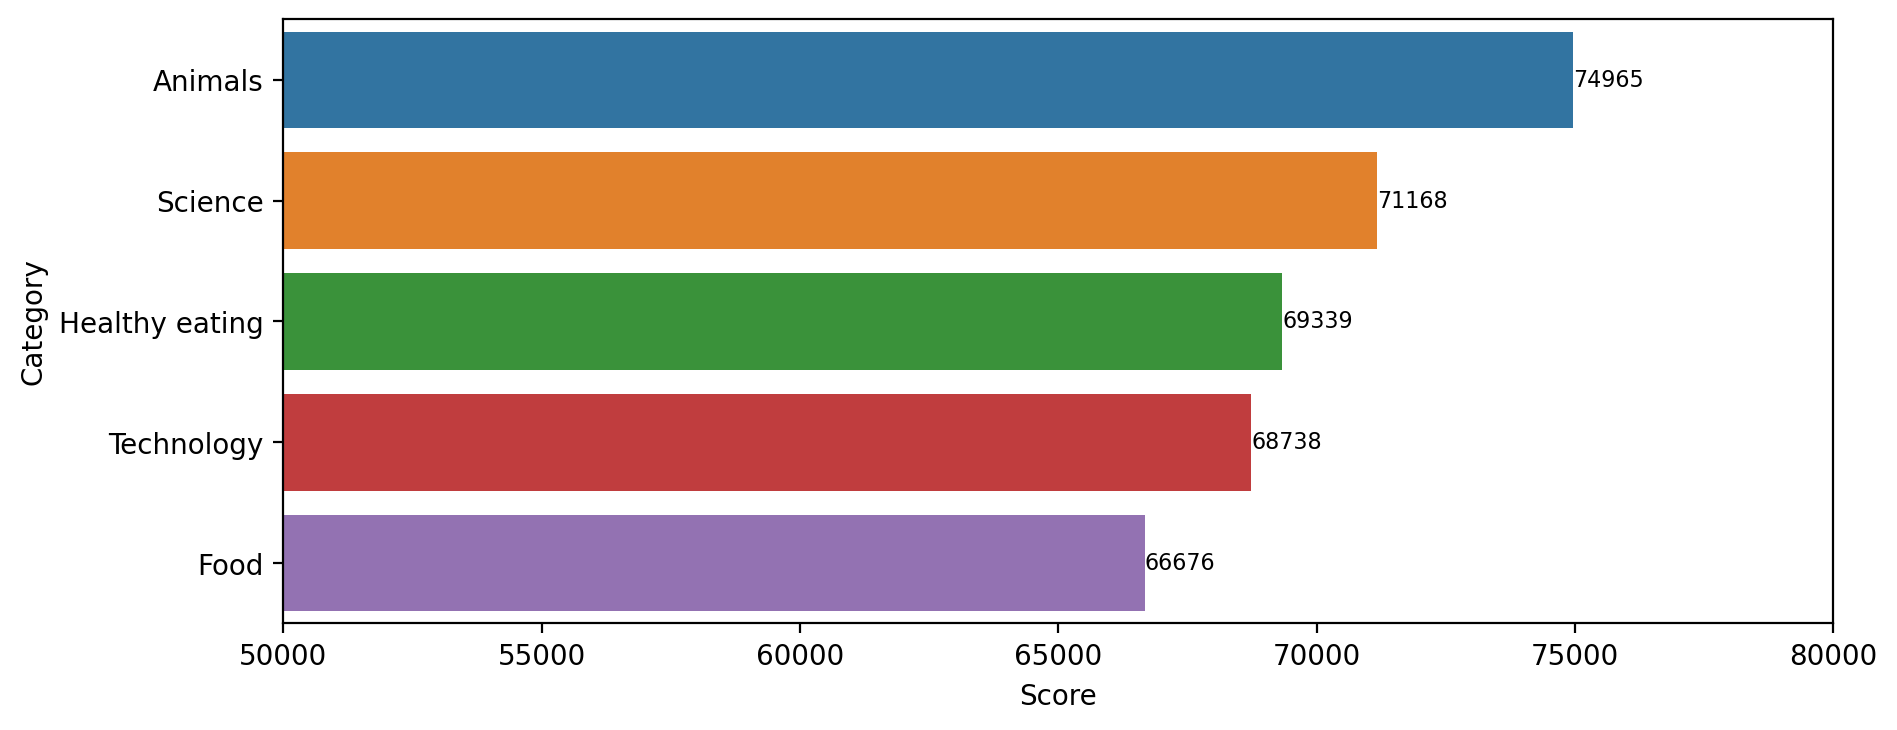

In [5]:
plt.figure(figsize=(10,4), dpi=200)
ax = sns.barplot(data=top_5_categories, x='Score', y='Category')
plt.xlim([50000, 80000])
for i, p in enumerate(ax.containers):
    ax.bar_label(p, label_type='edge', fontsize=8)
plt.tight_layout
plt.savefig('top_5.jpg', bbox_inches='tight')




---

## Unique Categories

In [6]:
agg_score

,Category,Score
0,Animals,74965
1,Cooking,64756
2,Culture,66579
3,Dogs,52511
4,Education,57436
5,Fitness,55323
6,Food,66676
7,Healthy eating,69339
8,Public speaking,49264
9,Science,71168


In [7]:
agg_score.set_index('Category').dfi.export('unique_categories.jpg')

objc[6869]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa5b07c550) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/109.0.5414.87/Libraries/libGLESv2.dylib (0x10fba9880). One of the two will be used. Which one is undefined.
[0118/191158.192997:INFO:headless_shell.cc(223)] 50531 bytes written to file /var/folders/wj/svnbv97s64954vllflf13_c00000gn/T/tmppjy7kl52/temp.png


---

## Reactions to the most popular category

In [8]:
merged_data.head()

,Content ID,Reaction type,Datetime,Content type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,Studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,Healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,Healthy eating,negative,0


In [9]:
pd.crosstab(merged_data['Category'], merged_data['Reaction type'])

Reaction type,adore,cherish,disgust,dislike,hate,heart,indifferent,interested,intrigued,like,love,peeking,scared,super love,want,worried
Category,,,,,,,,,,,,,,,,
Animals,114,125,122,115,128,120,100,110,116,101,119,129,132,123,122,121
Cooking,106,84,109,115,104,112,81,125,88,114,99,101,120,110,94,102
Culture,95,113,98,112,94,97,111,110,101,97,108,99,117,100,122,102
Dogs,81,72,87,84,87,97,93,91,70,93,73,92,89,84,83,62
Education,83,87,73,91,96,91,89,88,96,90,105,99,80,92,83,90
Fitness,96,73,96,95,71,83,82,81,82,111,88,86,96,100,72,83
Food,93,119,107,106,130,107,97,108,94,100,123,115,101,89,110,100
Healthy eating,122,105,103,101,121,114,108,101,107,106,103,104,100,116,111,95
Public speaking,76,65,69,82,61,88,77,75,92,74,85,65,75,76,81,76


In [10]:
def mask(category):
    if category in ['Animals', 'Science', 'Healthy eating', 'Technology', 'Food']:
        return True
    else:
        return False
    

In [11]:
cat_react = merged_data.loc[merged_data['Category'].apply(mask)]
cat_react_animal = cat_react.loc[cat_react['Category']=='Animal']
cat_react

,Content ID,Reaction type,Datetime,Content type,Category,Sentiment,Score
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,Healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,Healthy eating,negative,0
10,5118e9c5-1377-4cc5-a486-65b35b7b7b76,disgust,2020-11-07 08:49:52,GIF,Science,negative,0
15,81abd65a-3b76-4574-a0a7-db6bf7184ae2,disgust,2020-12-08 13:12:56,video,Food,negative,0
16,81abd65a-3b76-4574-a0a7-db6bf7184ae2,disgust,2021-01-05 13:15:46,video,Food,negative,0
...,...,...,...,...,...,...,...
24556,89cb4504-fccd-40f4-945e-410f74ee4735,adore,2020-10-03 18:30:41,photo,Animals,positive,72
24557,89cb4504-fccd-40f4-945e-410f74ee4735,adore,2021-05-08 17:29:47,photo,Animals,positive,72
24563,c54b49c4-b1f2-4641-8595-1cbd19937845,adore,2021-06-09 10:23:47,photo,Science,positive,72
24564,c54b49c4-b1f2-4641-8595-1cbd19937845,adore,2020-07-29 13:54:24,photo,Science,positive,72


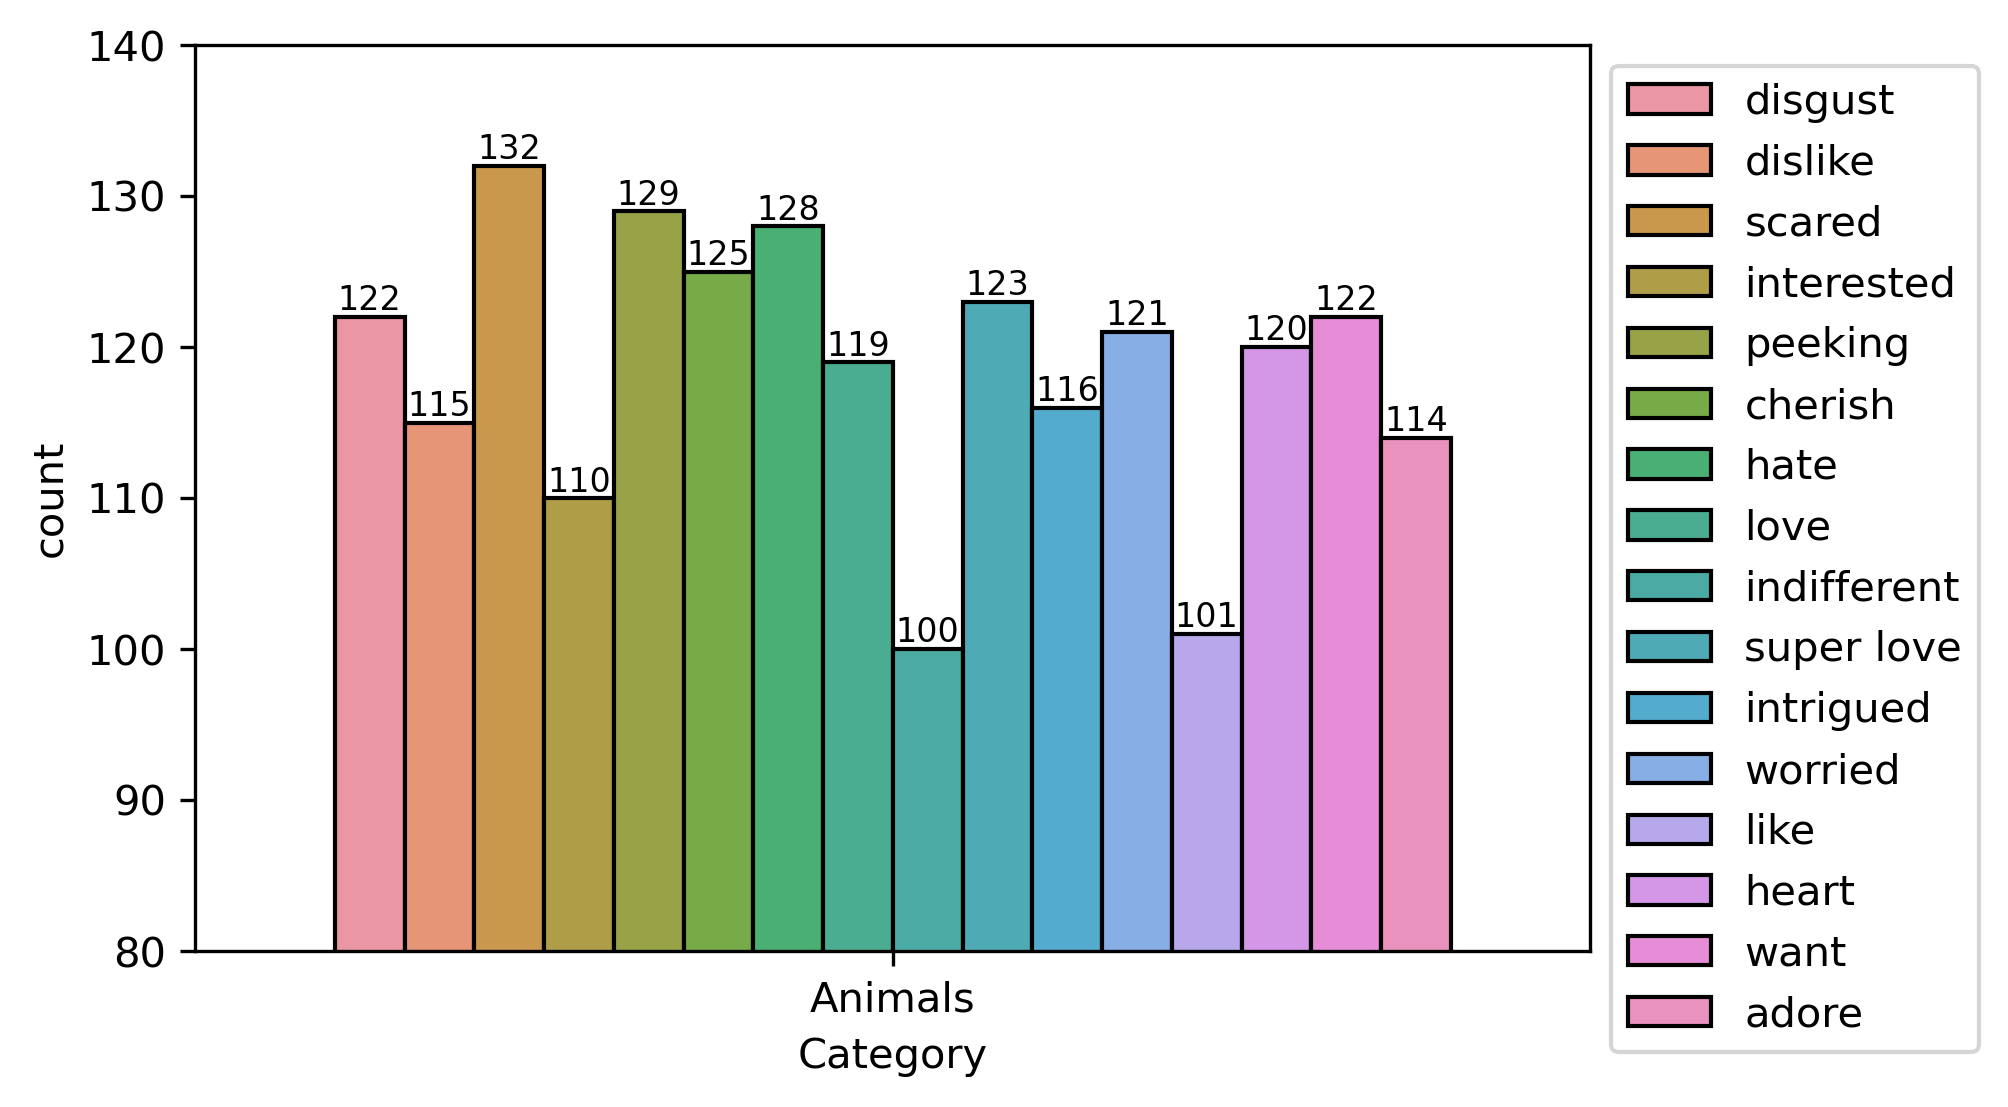

In [12]:
plt.subplots(figsize=(6,4), dpi=300)
ax = sns.countplot(x='Category', hue='Reaction type', data=cat_react.loc[cat_react['Category']=='Animals'], edgecolor='black')
plt.ylim([80,140])
for i, p in enumerate(ax.containers):
    ax.bar_label(p, label_type='edge', fontsize=8)
ax.legend(loc='upper left', bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.tight_layout
plt.savefig('reactions.jpg', bbox_inches='tight')

---

## Month with most posts

In [13]:
merged_data['Month'] = merged_data['Datetime'].dt.strftime('%B')
merged_data['Month'] = merged_data['Month'].astype('category')
merged_data

,Content ID,Reaction type,Datetime,Content type,Category,Sentiment,Score,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0,November
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0,January
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,Studying,negative,0,April
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,Healthy eating,negative,0,March
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,Healthy eating,negative,0,August
...,...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,audio,Veganism,positive,72,October
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,audio,Veganism,positive,72,September
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,GIF,Culture,positive,72,October
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,GIF,Culture,positive,72,June


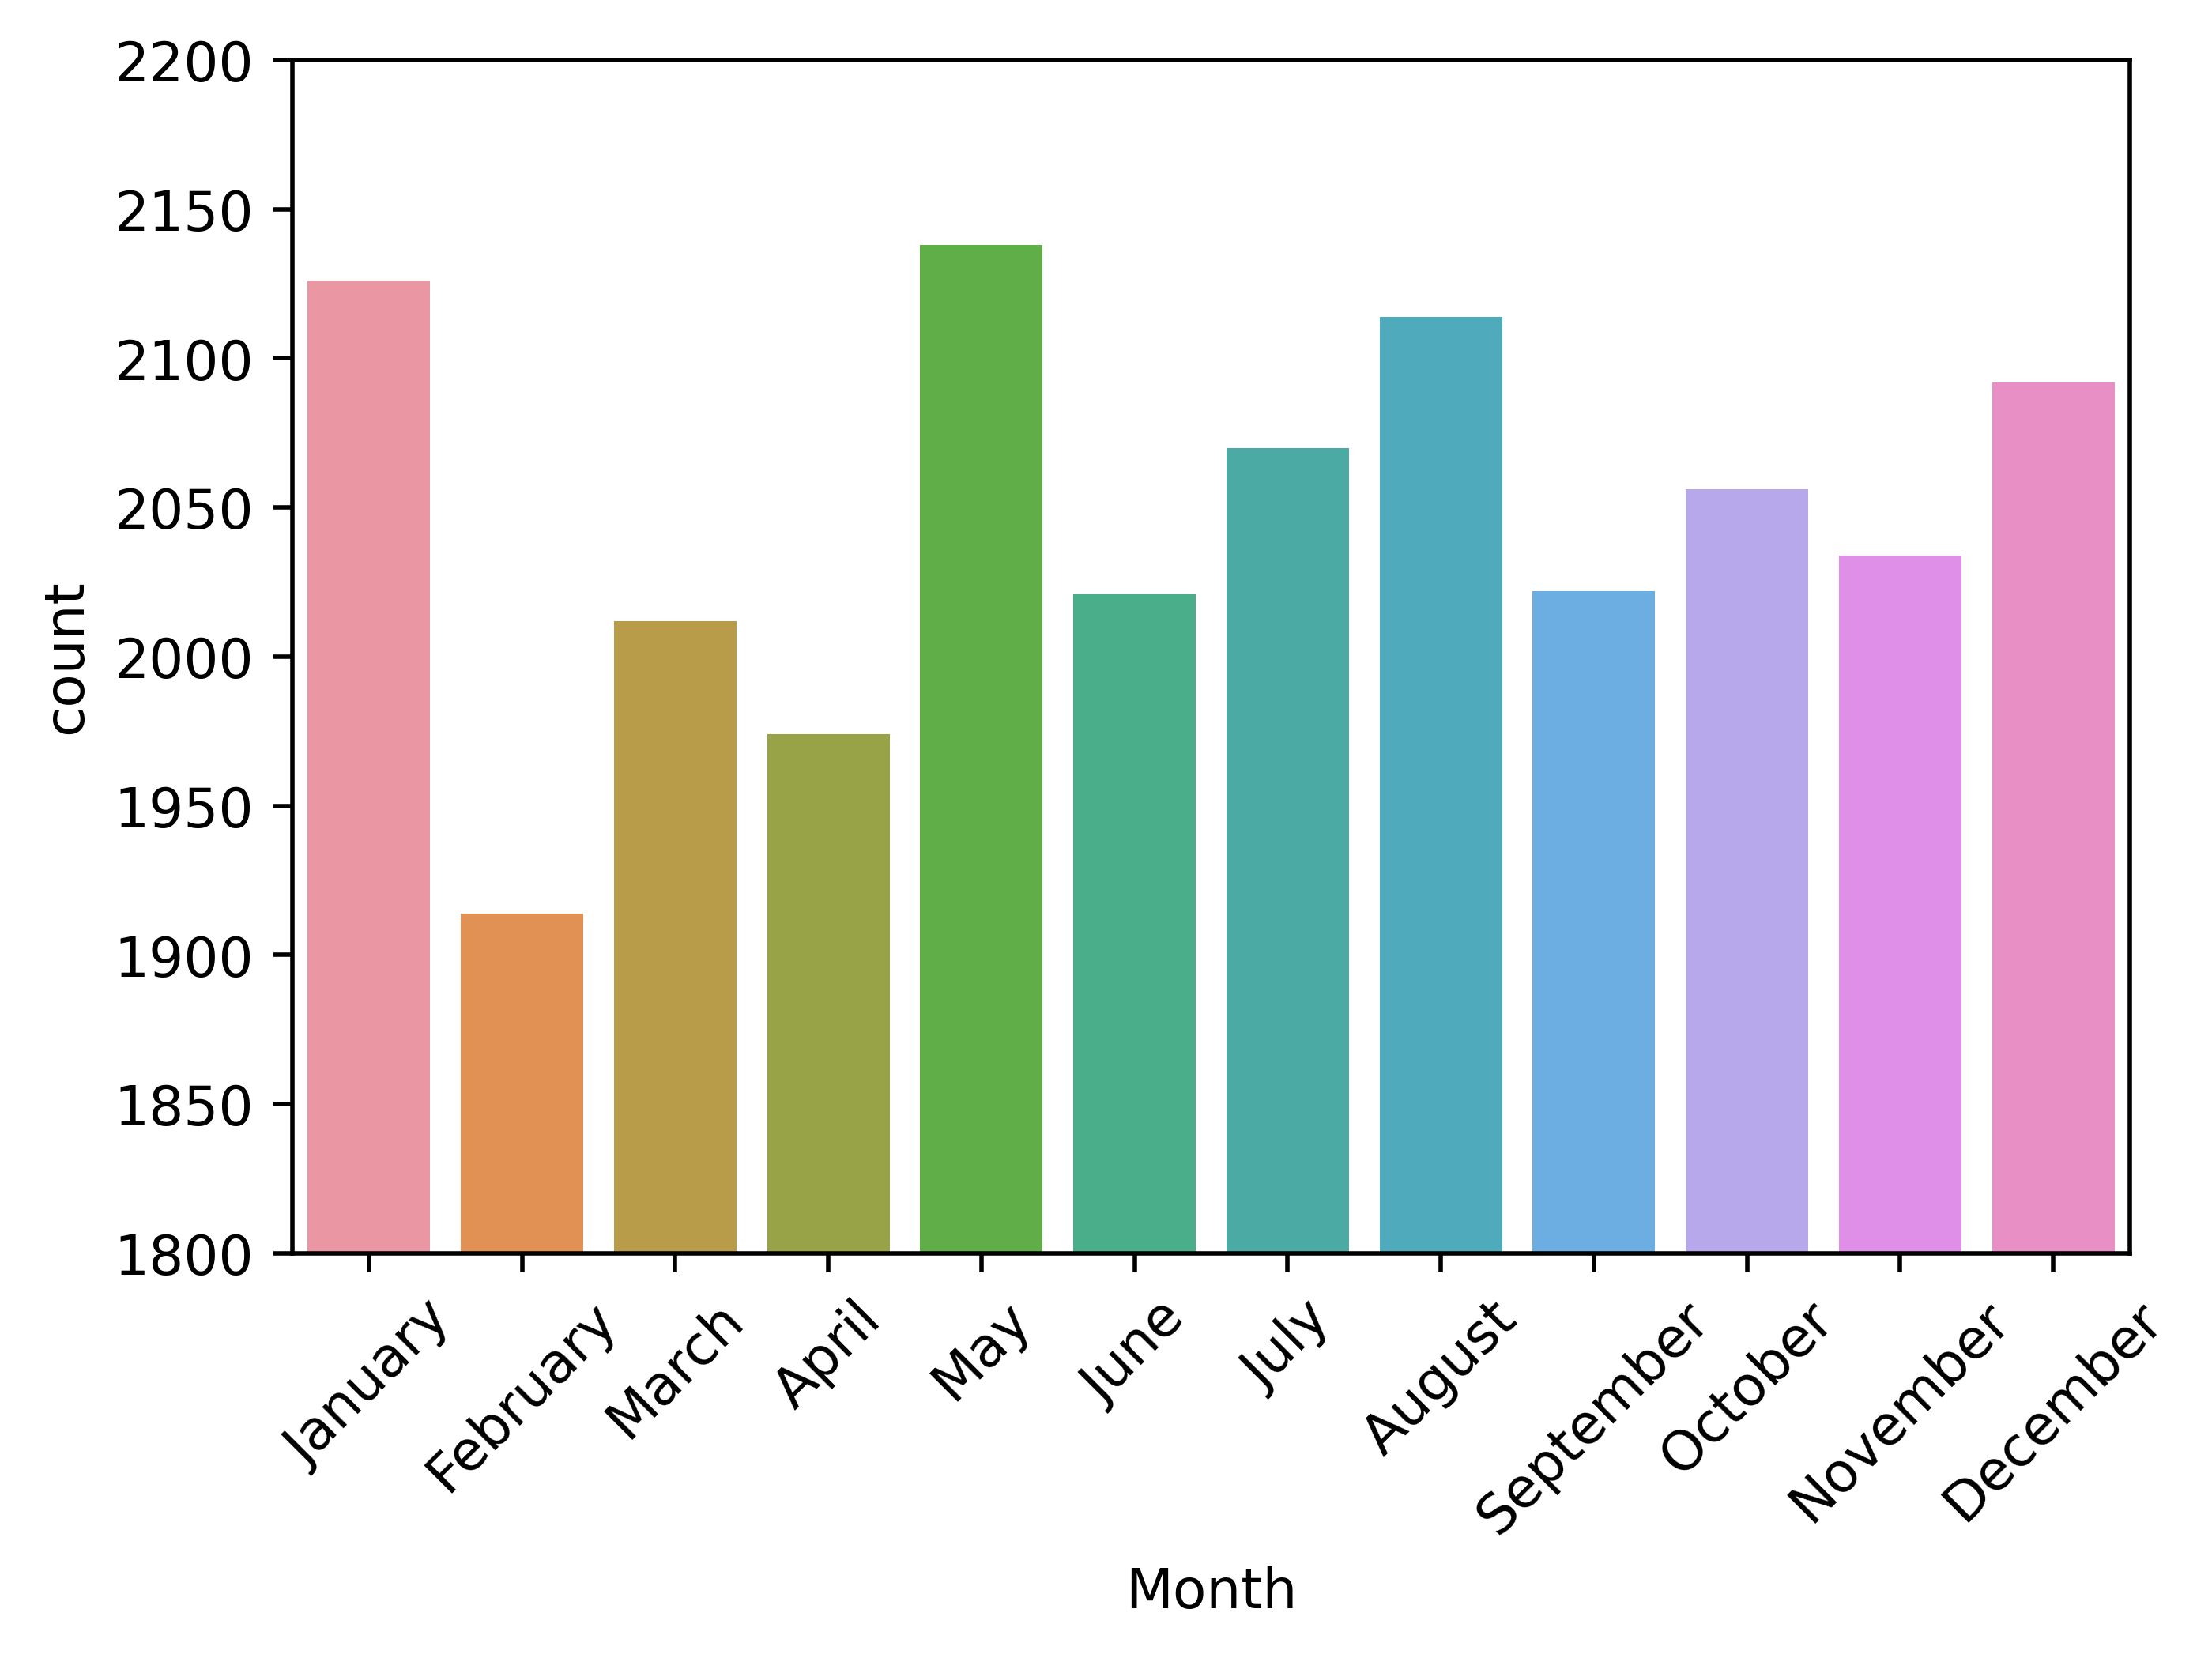

In [14]:
plt.subplots(figsize=(6,4), dpi=500)
sns.countplot(data=merged_data, x='Month', order=['January', 'February', 'March', 'April', 
                                                  'May', 'June', 'July', 'August', 'September', 
                                                  'October', 'November', 'December'])
plt.ylim([1800, 2200])
for i, p in enumerate(ax.containers):
    ax.bar_label(p, label_type='edge', fontsize=8)
plt.xticks(rotation=45)
plt.tight_layout
plt.savefig('highest_month.jpg', bbox_inches='tight')